# Exploratory Analysis

## Import statements

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading

In [31]:
file_link = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094"

raw_data = pd.read_csv(file_link)
raw_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [32]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [33]:
raw_data.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


### Observations:
1. There are 5.5 lakh records of transaction data
2. User ID and Product ID columns identify the product purchased by a user in the current transaction
3. User ID is of int data type and should be changed to string
4. There does not seem to be an unique identifier for each transaction
5. There are 3631 unique products
6. There are not any null values in the data
7. The category columns such as Occupation, City_Category, Marital_Status, Product_Category are of int data type and are masked so need to change to category type

### Next Steps:
1. Convert User ID to type string (so no numerical operations may be performed)
2. Create a unique id for each transaciton using the row number and cast it as string
3. Convert the masked int category columns to type category with appropriate prefix
4. Check for outliers in the numerical and categorical columns
5. Check the different types of categories and their frequencies in each categorical column

## Data Cleaning

1. Changing Data Types
2. Checking Missing values
3. Outlier Detection

In [34]:
clean_data = raw_data.reset_index().copy()

clean_data['User_ID'] = clean_data['User_ID'].astype('str')
clean_data['Product_ID'] = clean_data['Product_ID'].astype('str')
clean_data.rename(columns={'index': 'Transaction_ID'}, inplace=True, errors='ignore')
clean_data['Transaction_ID'] = clean_data['Transaction_ID'].astype('str')

clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Transaction_ID              550068 non-null  object
 1   User_ID                     550068 non-null  object
 2   Product_ID                  550068 non-null  object
 3   Gender                      550068 non-null  object
 4   Age                         550068 non-null  object
 5   Occupation                  550068 non-null  int64 
 6   City_Category               550068 non-null  object
 7   Stay_In_Current_City_Years  550068 non-null  object
 8   Marital_Status              550068 non-null  int64 
 9   Product_Category            550068 non-null  int64 
 10  Purchase                    550068 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 46.2+ MB


In [35]:
clean_data.isna().sum()

Transaction_ID                0
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [36]:
value_counts = pd.DataFrame()

columns_to_check = [
    'Gender', 'Age', 'Occupation',
    'City_Category', 'Stay_In_Current_City_Years',
    'Marital_Status', 'Product_Category'
    ]

for column in columns_to_check:
    column_value_counts = (
        clean_data[column]
        .value_counts()
        .reset_index()
        .rename(columns={column:'value'})
        )
    column_value_counts['pct'] = column_value_counts['count'] * 100 / clean_data.shape[0]
    column_value_counts['column'] = column
    value_counts = pd.concat([value_counts, column_value_counts], ignore_index=True)

value_counts[['column', 'value', 'count', 'pct']]

,column,value,count,pct
0,Gender,M,414259,75.310507
1,Gender,F,135809,24.689493
2,Age,26-35,219587,39.919974
3,Age,36-45,110013,19.999891
4,Age,18-25,99660,18.117760
5,Age,46-50,45701,8.308246
6,Age,51-55,38501,6.999316
7,Age,55+,21504,3.909335
8,Age,0-17,15102,2.745479
9,Occupation,4,72308,13.145284


*Assumption: Marital Status 1 means married and 0 means unmarried*

In [37]:
columns_to_convert = {
    'Gender', 'Age','Occupation',
    'Marital_Status', 'Product_Category',
    'City_Category', 'Stay_In_Current_City_Years'
}

for column in columns_to_convert:
    if column in {'Marital_Status'}:
        clean_data[column] = clean_data[column].apply(lambda x: 'Married' if x == 1 else 'Unmarried')
    elif column in {'Product_Category', 'Occupation'}:
        clean_data[column] = clean_data[column].apply(lambda x: f'{column}_{str(x)}')
    clean_data[column] = clean_data[column].astype('category')

clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Transaction_ID              550068 non-null  object  
 1   User_ID                     550068 non-null  object  
 2   Product_ID                  550068 non-null  object  
 3   Gender                      550068 non-null  category
 4   Age                         550068 non-null  category
 5   Occupation                  550068 non-null  category
 6   City_Category               550068 non-null  category
 7   Stay_In_Current_City_Years  550068 non-null  category
 8   Marital_Status              550068 non-null  category
 9   Product_Category            550068 non-null  category
 10  Purchase                    550068 non-null  int64   
dtypes: category(7), int64(1), object(3)
memory usage: 20.5+ MB


In [38]:
clean_data.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [39]:
clean_data.describe(include='category')

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068
unique,2,7,21,3,5,2,20
top,M,26-35,Occupation_4,B,1,Unmarried,Product_Category_5
freq,414259,219587,72308,231173,193821,324731,150933


<Axes: ylabel='Purchase'>

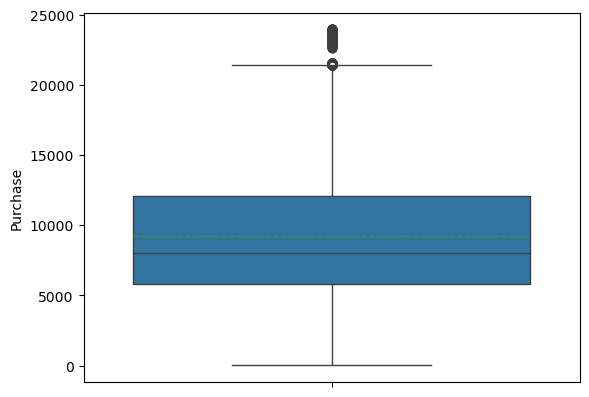

In [40]:
sns.boxplot(y=clean_data['Purchase'], meanline=True, showmeans=True)

In [41]:
iqr = clean_data['Purchase'].quantile(0.75) - clean_data['Purchase'].quantile(0.25)
lower_bound = clean_data['Purchase'].quantile(0.25) - 1.5 * iqr
upper_bound = clean_data['Purchase'].quantile(0.75) + 1.5 * iqr

total_count = clean_data.shape[0]
lower_count = clean_data[clean_data['Purchase'] < lower_bound].shape[0]
upper_count = clean_data[clean_data['Purchase'] > upper_bound].shape[0]
inner_count = total_count - lower_count - upper_count

outlier_distribution = pd.DataFrame({
    'Bound': [f'< {lower_bound}', f'{lower_bound} - {upper_bound}', f'> {upper_bound}'],
    'Count': [lower_count, inner_count, upper_count],
    'Percentage': [lower_count*100/total_count, inner_count*100/total_count, upper_count*100/total_count]
    }
)
outlier_distribution

,Bound,Count,Percentage
0,< -3523.5,0,0.000000
1,-3523.5 - 21400.5,547391,99.513333
2,> 21400.5,2677,0.486667


<Axes: xlabel='Purchase', ylabel='Count'>

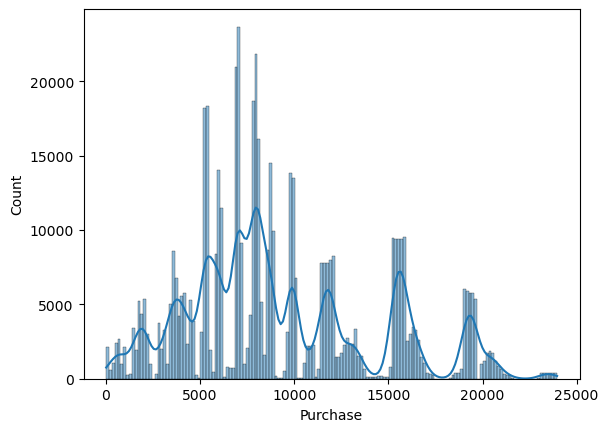

In [42]:
sns.histplot(clean_data['Purchase'], kde=True)

In [43]:
clean_data['Purchase'].mean(), clean_data['Purchase'].median()

(9263.968712959126, 8047.0)

### Observations:

1. There are no missing values in the data as confirmed earlier
2. All the categorical variables have a significant size of samples except for occupation 8 and product category 9 which have less than 1% of samples, since there will not be much analysis of these columns for the current problem statement, it can be ignored
3. There are 0.5% outliers in the purchase amount column which are above upper limit of 21400 but are still less than 25000, so these outliers does not seem to negatively affect or represent the data
4. The mean purchase amount is greater than the median which means the distribution is right skewed as confirmed by the hist plot
5. The product category and occupation columns are masked with each containing around 20 unique values which will make it hard to analyse since we cannot bin it or infer business insight directly from it, hence these columns can be dropped from here including the product id column

### Next Steps:

1. Drop the product category and occupation columns
2. Perform univariate exploratory analysis of all columns
3. Perform bivariate exploratory analysis of all columns 

In [44]:
analysis_data = clean_data.drop(columns=['Occupation', 'Product_Category', 'Product_ID'])
analysis_data.head()

,Transaction_ID,User_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,0,1000001,F,0-17,A,2,Unmarried,8370
1,1,1000001,F,0-17,A,2,Unmarried,15200
2,2,1000001,F,0-17,A,2,Unmarried,1422
3,3,1000001,F,0-17,A,2,Unmarried,1057
4,4,1000002,M,55+,C,4+,Unmarried,7969


## Univariate Analysis

**Types of columns:**

| Categorical               | ID Columns    | Numerical |
| :------------------------ | :------------ | :-------- |
| Gender                    | Transaction_ID| Purchase  |
| Age                       | User_ID       |           |
| City_Category             |               |           |
| Stay_In_Current_City_Years|               |           |
| Marital_Status            |               |           |

*For categorical variables*

| Category                  | Metric                                | Visualisation |
| :------------------------ | :------------                         | :--------     |
| Gender                    | # Customers                           | Column Chart  |
| Age                       | # Transactions                        |               |
| City_Category             | Avg Purchase Amount per Transaction   |               |
| Stay_In_Current_City_Years| Avg Purchase Amount per User          |               |
| Marital_Status            |                                       |               |
| Purchase Amount Bucket    |                                       |               |

*For numerical variables*

| Numerical | Metric        | Visualisation |
| :-------- | :------------ | :--------     |
| Purchase  | Distribution  | Box Plot      |
|           |               | Hist Plot     |


In [46]:
id_columns = ['User_ID', 'Transaction_ID']
categorical_columns = analysis_data.select_dtypes(include='category').columns.tolist()
numerical_columns = analysis_data.select_dtypes(include='number').columns.tolist()

categorical_columns, numerical_columns

(['Gender',
  'Age',
  'City_Category',
  'Stay_In_Current_City_Years',
  'Marital_Status'],
 ['Purchase'])